<a href="https://colab.research.google.com/github/TheAnubisGod/Robotics/blob/main/PID_(Lab3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №3 (Моделирование работы двигателя, управляемого ПИД-регулятором)

<h1>Выполнил: студент группы R3137 Дюжев Владислав Дмитриевич</h1>

## Цель
Базовым алгоритмом для управления переходными процессами является ПИД-регулятор. В данной лабораторной мы займемся моделированием процесса управления двигателем постоянного тока.

##Математическая модель

Воспользуемся полной моделью двигателя постоянного тока, полученной в прошлой лабораторной:
$$\begin{cases} \dot\theta = \omega\\ \dot\omega = \frac{k_mI}{J} \\ \dot{I} = \frac{U_{ctrl}}{L} - \frac{k_e}{L}\omega - \frac{RI}{L} \end{cases}$$
$$\frac{L}{R}\ddot\omega + \dot\omega+\frac{k_m k_e}{JR}\omega=\frac{k_m}{JR}U$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Инициализируем конструктивне постоянные:

In [2]:
J = 0.0025873
L = 0.0047
k_e = 0.487998
k_m = 0.487998
R = 8.119501
U_max = 7.51

reg_koef = U_max/100

Функция, описывающая дифференциальное уравнение:

In [3]:
def solve_func(y, t, u):
  theta, omega, i = y
  dydt = [omega, k_m*i/J, u/L - k_e*omega/L - R*i/L]
  return dydt

##Моделирование

In [4]:
def modelate_pid_motor(kp, ki, kd, u_max, angle_stat, mod_t, cyc_t):
  cycle_times = int(mod_t / cyc_t) # Количество итераций при моделировании
  time = np.linspace(0, mod_t, cycle_times) # Время моделирования

  P = np.zeros(cycle_times) # Пропорциональная составляющая
  I = np.zeros(cycle_times) # Интегральная составляющая
  D = np.zeros(cycle_times) # Дифференциальная составляющая
  err = np.zeros(cycle_times) # Ошибка                                     
  u_cur = np.zeros(cycle_times) # Управляющее воздействие                    
  theta = np.zeros(cycle_times) # Угол
  cur = np.zeros(cycle_times) # Ток
  omega = np.zeros(cycle_times) # Скорость                             
  setpoint = np.zeros(cycle_times) # Целевой угол                            
  setpoint[0:cycle_times] = angle_stat                                  
  init = [0, 0, 0] # Начальные значения угла, скорости, тока

  for i in range(1,cycle_times):
      _t = [time[i-1],time[i]]        

      state = odeint(solve_func,init,_t,args=(u_cur[i-1],)) # Получение текущих значений
      init = state[1,:] # Установка начальных условий следующей итерации   

      # Запись полученных значений                      
      theta[i] = init[0] 
      omega[i] = init[1]
      cur[i] = init[2]     

      err[i] = setpoint[i] - theta[i] # Расчет ошибки
      dt = time[i] - time[i-1] # Приращение времени     

      # Расчет управляющего воздействия                    
      P[i] = kp * err[i]                                    
      I[i] = I[i-1] + ki * (err[i] + err[i-1]) * dt / 2                     
      D[i] = kd * (err[i]-err[i-1])/dt              
      u_cur[i] = P[i] + I[i] + D[i]                  
      if u_cur[i] > u_max:
              u_cur[i] = u_max
      if u_cur[i] < -u_max:
              u_cur[i] = -u_max 

  return [time, theta, omega, cur] # Получение данных

In [5]:
kP = 2
kI = 0.2
kD = 1

state_angle = 2*np.pi; # Установившийся угол

cycle_time = 10**-3 # Время одной итерации
model_time = 5 # Время моделирования

t, angle, speed, current = modelate_pid_motor(kP, kI, kD, U_max, state_angle, model_time, cycle_time)

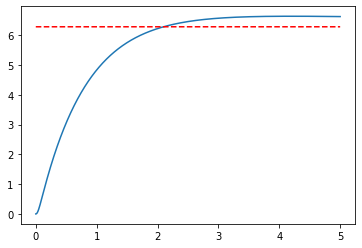

In [6]:
plt.plot(t, angle) # График угла
plt.plot(t, [state_angle]*len(t), "r--")

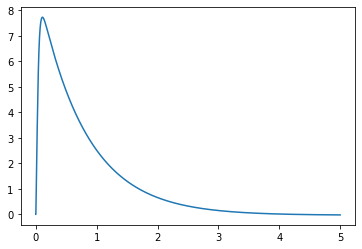

In [7]:
plt.plot(t, speed) # График скорости

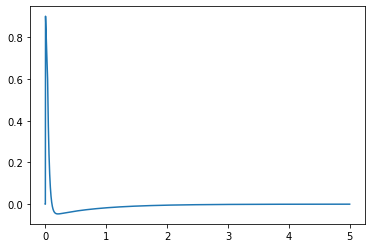

In [8]:
plt.plot(t, current) # График тока

##Обработка экспериментальных данных

Импортируем файлы с полученными данными:

In [9]:
from google.colab import files 
import pandas as pd
uploaded = files.upload()  

Saving PID_controller(0.05,0.01,0).csv to PID_controller(0.05,0.01,0) (2).csv
Saving PID_controller(0.05,0.03,0).csv to PID_controller(0.05,0.03,0) (2).csv
Saving PID_controller(0.05,0.09,0).csv to PID_controller(0.05,0.09,0) (2).csv
Saving PID_controller(0.05,0.27,0).csv to PID_controller(0.05,0.27,0) (2).csv
Saving PID_controller(0.05,0.81,0).csv to PID_controller(0.05,0.81,0) (2).csv
Saving PID_controller(0.05,2.43,0).csv to PID_controller(0.05,2.43,0) (2).csv
Saving PID_controller(0.5,0.2,0.12).csv to PID_controller(0.5,0.2,0.12) (2).csv
Saving PID_controller(2,0,0.12).csv to PID_controller(2,0,0.12) (2).csv
Saving PID_controller(2,0.2,0.01).csv to PID_controller(2,0.2,0.01) (2).csv
Saving PID_controller(2,0.2,0.12).csv to PID_controller(2,0.2,0.12) (2).csv
Saving PID_controller(2,0.2,1).csv to PID_controller(2,0.2,1) (2).csv
Saving PID_controller(2,1.5,0.12).csv to PID_controller(2,1.5,0.12) (2).csv
Saving PID_controller(10,0,0.02).csv to PID_controller(10,0,0.02) (2).csv
Saving P

Построим графики:

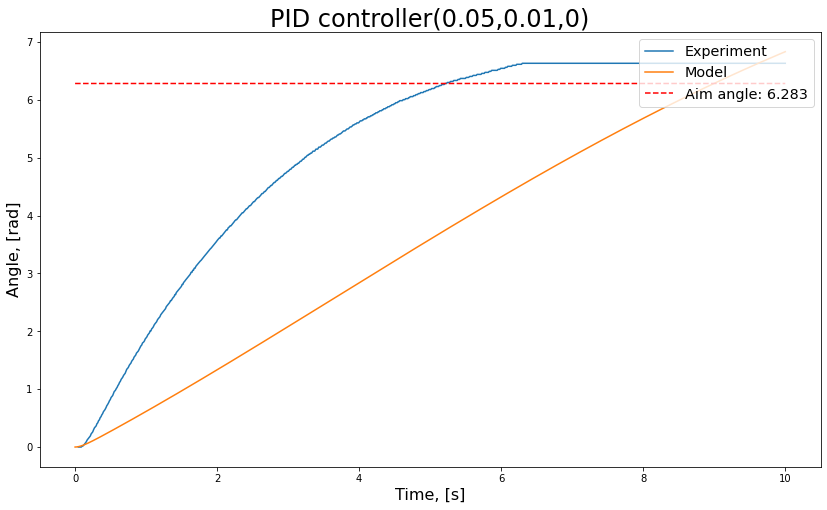

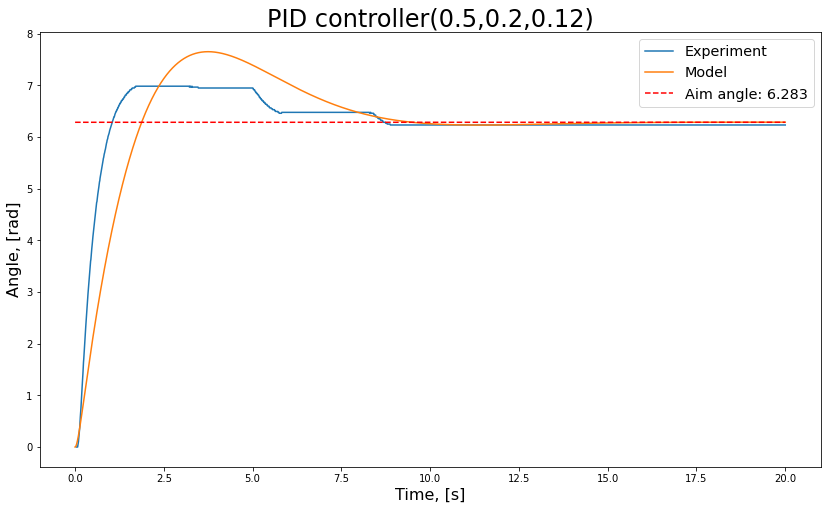

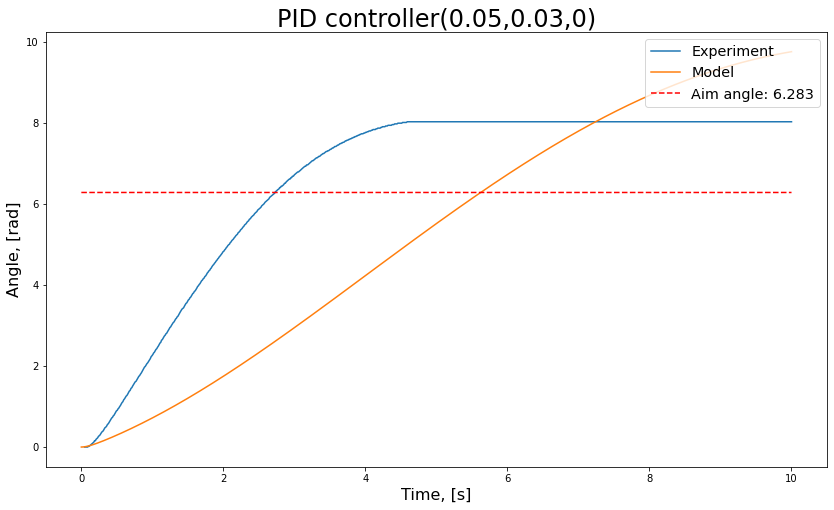

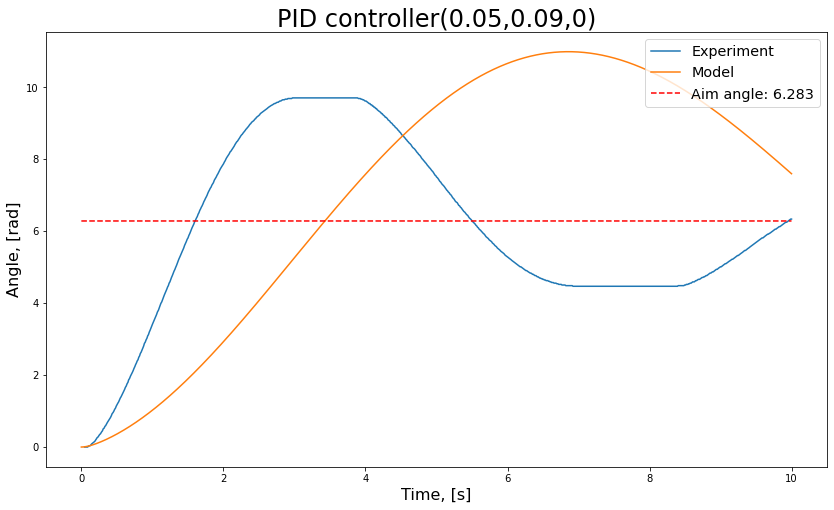

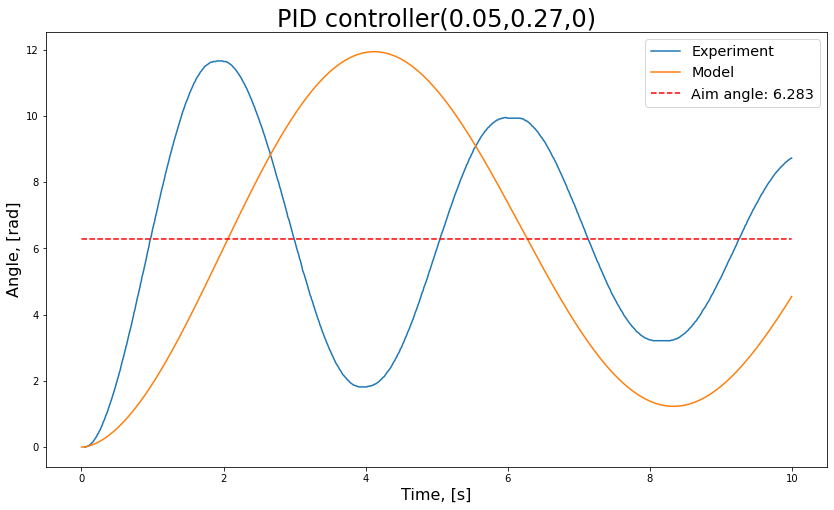

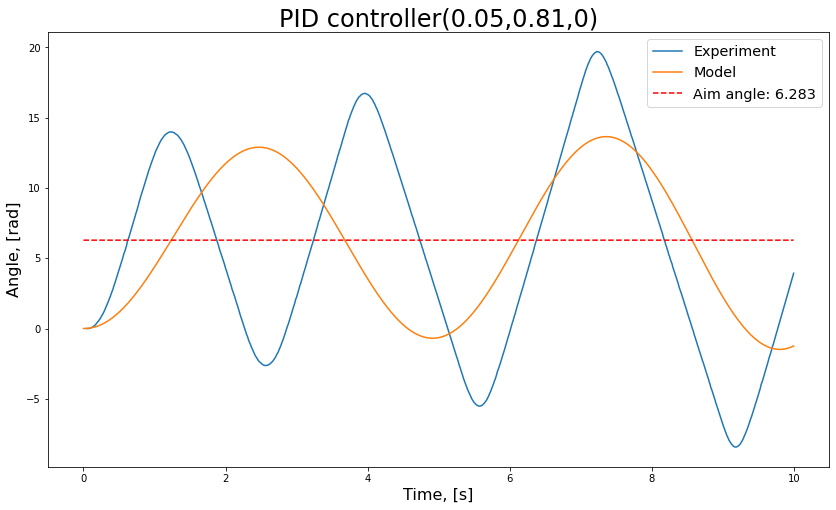

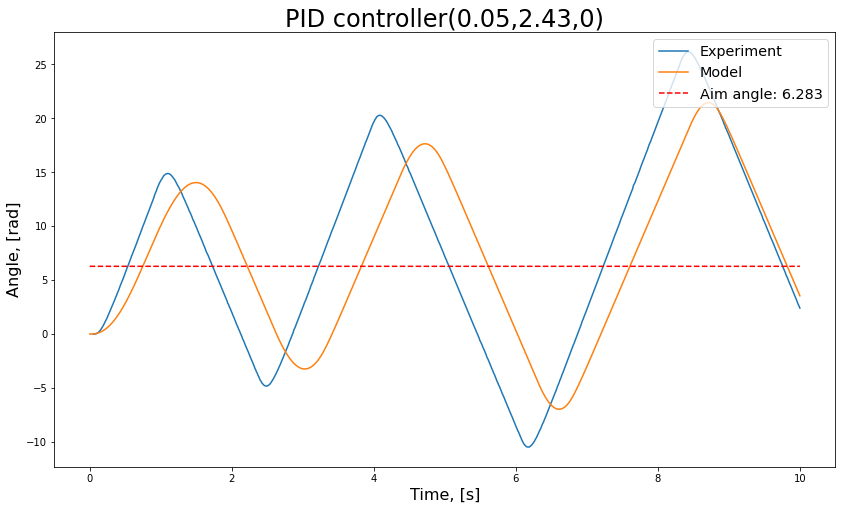

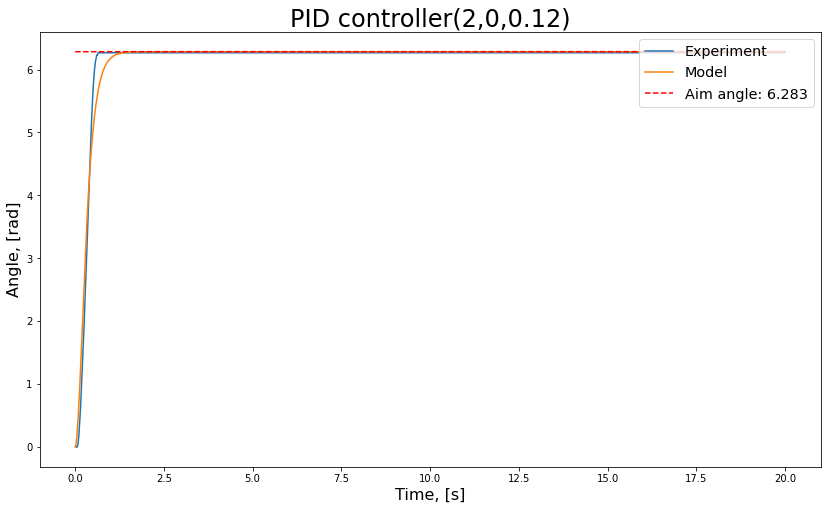

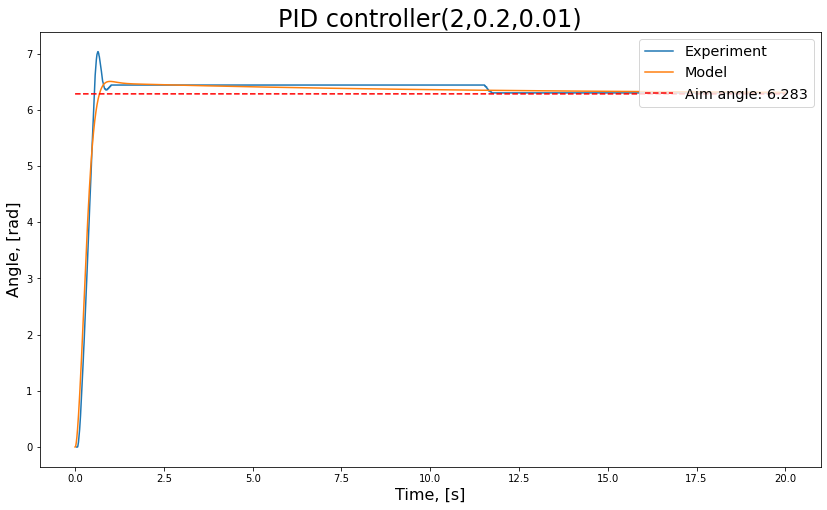

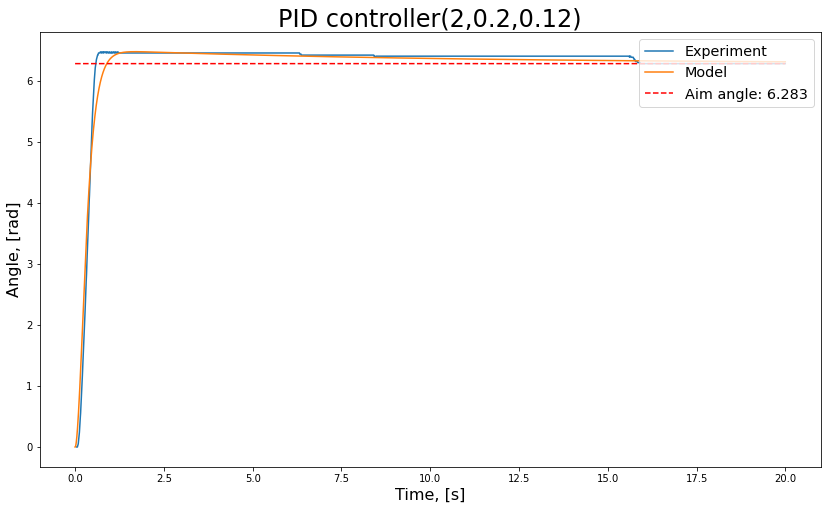

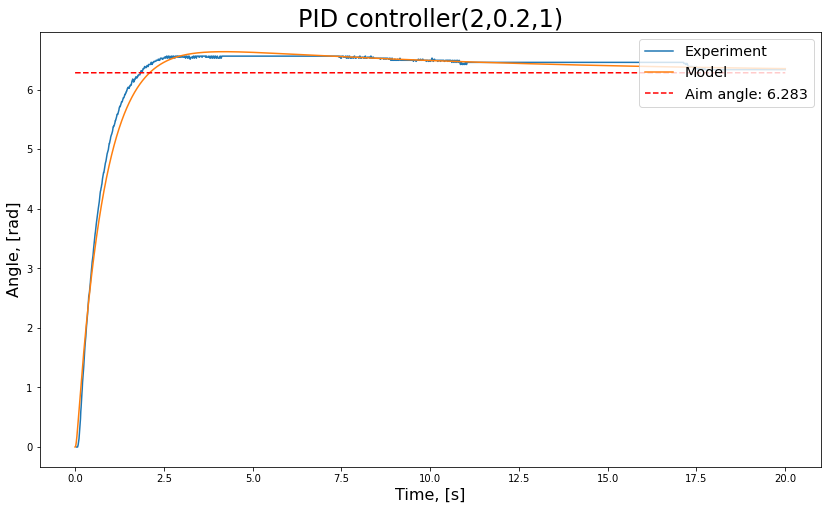

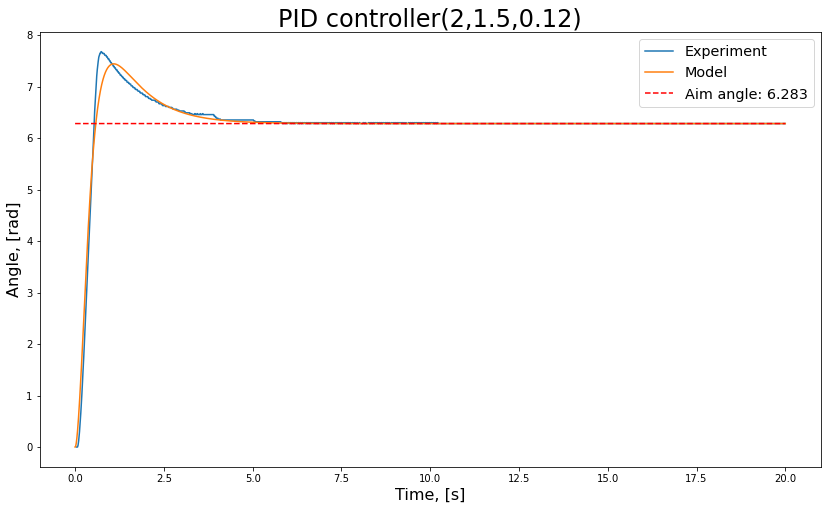

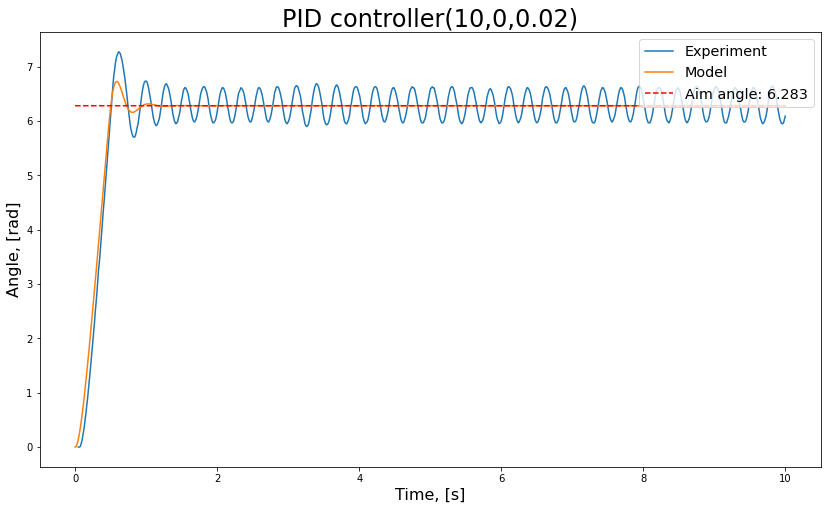

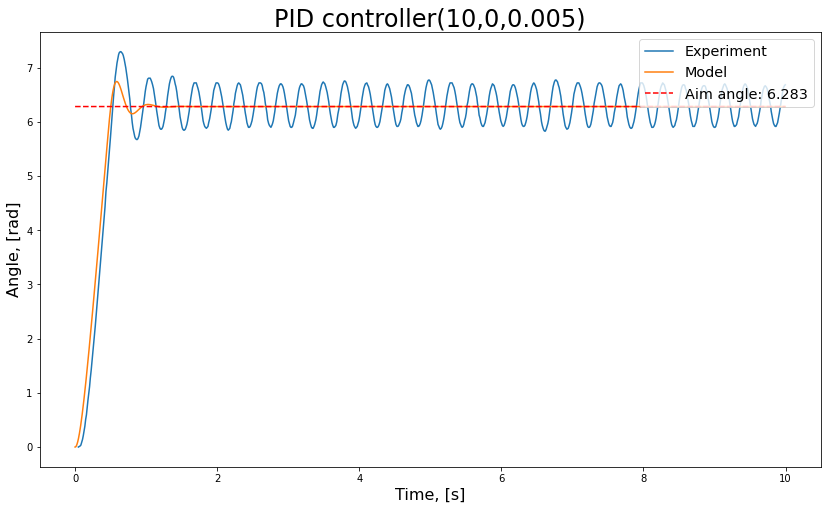

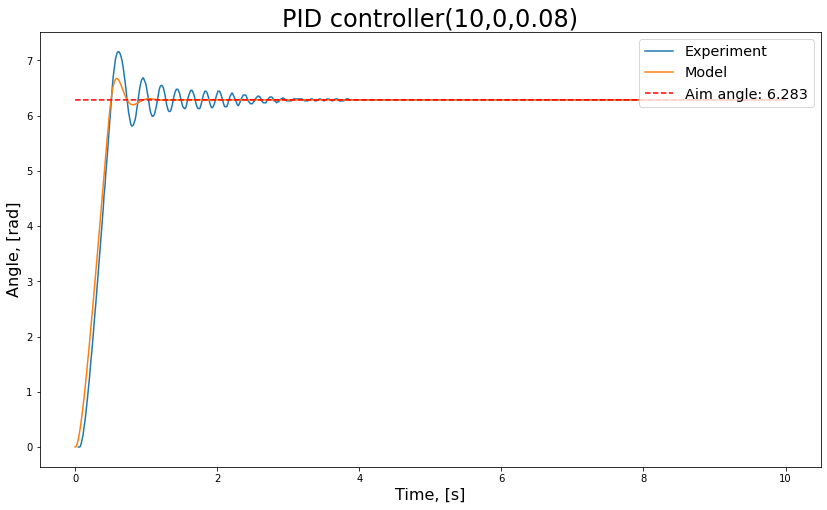

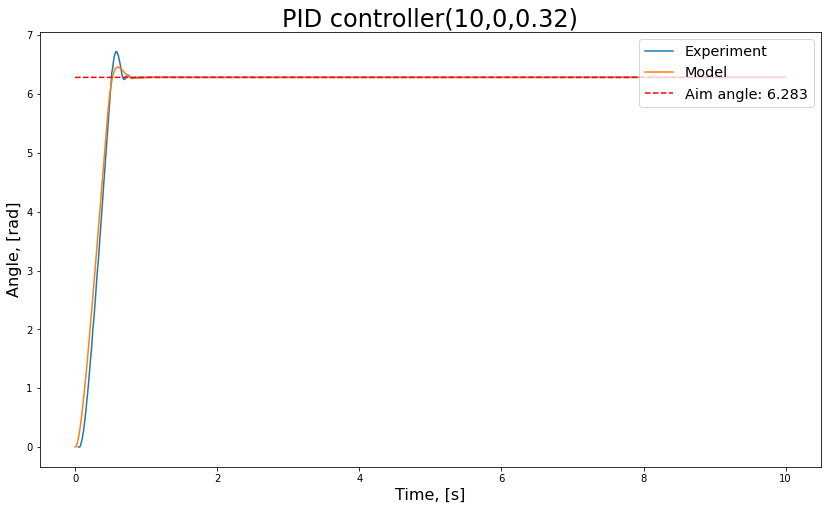

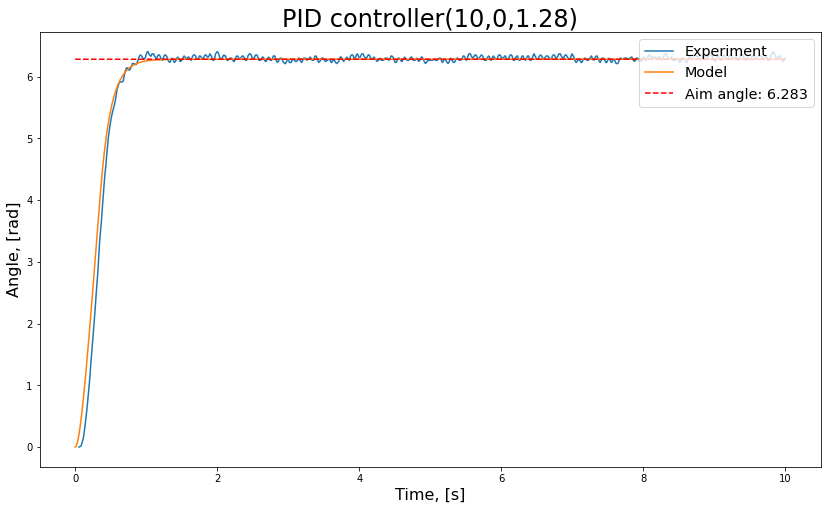

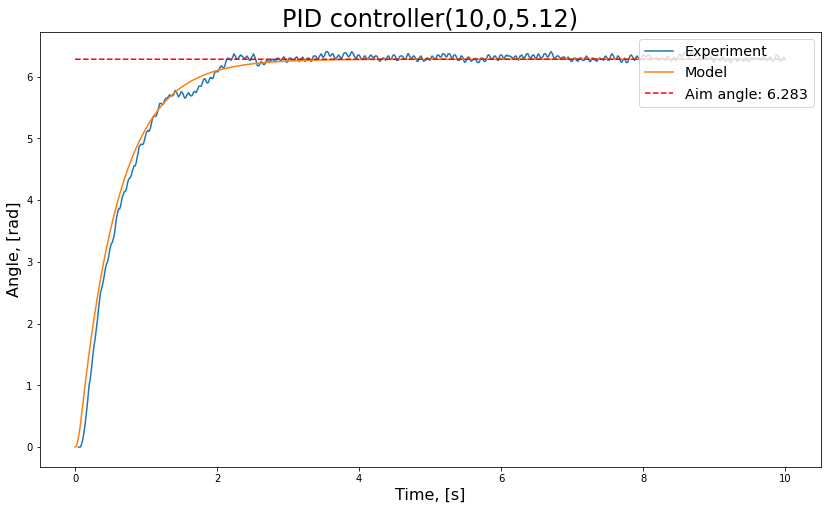

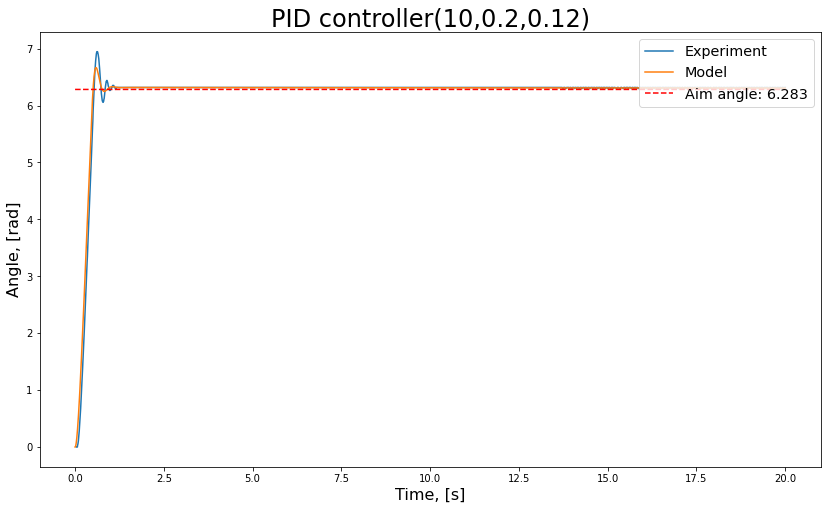

In [10]:
P_list = [0.05,0.5,0.05,0.05,0.05,0.05,0.05,2,2,2,2,2,10,10,10,10,10,10,10];
I_list = [0.01,0.2,0.03,0.09,0.27,0.81,2.43,0,0.2,0.2,0.2,1.5,0,0,0,0,0,0,0.2];
D_list = [0,0.12,0,0,0,0,0,0.12,0.01,0.12,1,0.12,0.02,0.005,0.08,0.32,1.28,5.12,0.12];

for i in range(len(P_list)):
  data = (pd.read_csv(f"PID_controller({P_list[i]},{I_list[i]},{D_list[i]}).csv", header=None, sep=",")).to_numpy()
  t, angle, speed, current = modelate_pid_motor(P_list[i], I_list[i], D_list[i], U_max, state_angle, data[-1,0], 10**-3)
  f, ax = plt.subplots(1, 1)
  f.set_size_inches((14, 8))
  plt.plot(data[:, 0], data[:, 1]*np.pi/180, label="Experiment")
  ax.plot(t, angle, label="Model")
  plt.plot(t, [state_angle]*len(t), "r--", label=f"Aim angle: {round(state_angle, 3)}")
  ax.set_xlabel("Time, [s]", size=16)
  ax.set_ylabel("Angle, [rad]", size=16)
  ax.set_title(f"PID controller({P_list[i]},{I_list[i]},{D_list[i]})", size=24)
  legend = ax.legend(loc='upper right', fontsize='x-large')
  legend.get_frame().set_facecolor('#FFFFFF')
  f.show()

##Усовершенствование алгоритма моделирования

Как видим, некоторые графики очень плохо описывают реальный процесс. Можно выделить 2 главных причины: </br>
1. Цикл на ev-3 выполняется не мгоновенно
2. Реальный двигатель при малых значениях выходного сигнала перестает вращаться (модель этого не учитывает)

Доработаем функцию моделирования, введя параметр "реальное время итерации". Будем выполнять вычисление управляющего воздействия по прошествию данного времени. Примем за время реальной итерации значение времени снятия показаний, деленного на их количество.

In [11]:
def modelate_pid_motor_advanced(kp, ki, kd, u_max, angle_stat, mod_t, cyc_t, real_it_time):
  time = 0
  I = [0]
  err = 0
  prev_err = 0                                 
  u_cur = 0                    
  theta = []
  cur = []
  omega = []
  setpoint = angle_stat                                  
  init = [0, 0, 0]

  while time < mod_t:
      time_between = np.linspace(time, time+real_it_time, 100)
      for j in range(1,100):
        _t = [time + time_between[j-1],time + time_between[j]]        
        state = odeint(solve_func,init,_t,args=(u_cur,))
        init = state[1,:]   
                     
        theta.append(init[0])
        omega.append(init[1])
        cur.append(init[2])   

      time += real_it_time
      err = setpoint - theta[-1]
      dt = real_it_time    
                    
      P = kp * err                                  
      I.append(I[-1] + ki * (err + prev_err) * dt / 2)                 
      D = kd * (err-prev_err)/dt              
      u_cur = P + I[-1] + D                  
      if u_cur > u_max:
              u_cur = u_max
      if u_cur < -u_max:
              u_cur = -u_max 
      prev_err = err

  return [np.linspace(0,time,len(theta)), theta, omega, cur]

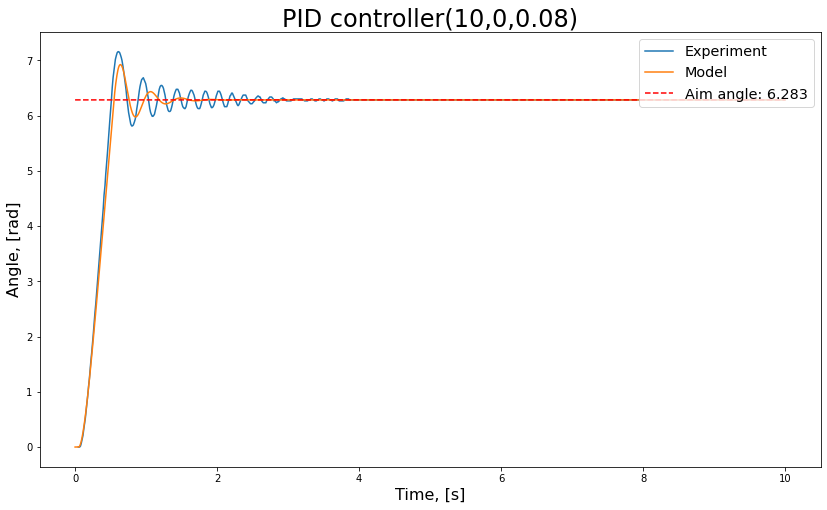

In [12]:
i = 14
data = (pd.read_csv(f"PID_controller({P_list[i]},{I_list[i]},{D_list[i]}).csv", header=None, sep=",")).to_numpy()
t, angle, speed, current = modelate_pid_motor_advanced(P_list[i], I_list[i], D_list[i], U_max, state_angle, data[-1,0], 10**-4, 0.05)
f, ax = plt.subplots(1, 1)
f.set_size_inches((14, 8))
plt.plot(data[:, 0], data[:, 1]*np.pi/180, label="Experiment")
ax.plot(t, angle, label="Model")
plt.plot(t, [state_angle]*len(t), "r--", label=f"Aim angle: {round(state_angle, 3)}")
ax.set_xlabel("Time, [s]", size=16)
ax.set_ylabel("Angle, [rad]", size=16)
ax.set_title(f"PID controller({P_list[i]},{I_list[i]},{D_list[i]})", size=24)
legend = ax.legend(loc='upper right', fontsize='x-large')
legend.get_frame().set_facecolor('#FFFFFF')
f.show()

Как видим, данное изменение немного увеличило точность моделирования.

##Выводы

1. В ходе выполнения данной лабораторной нам удалось реализовать алгоритм моделирования системы, управляемой ПИД-регулятором. 
2. В некоторых случаях (при маленьких значениях P-составляющей) моделирование показывало плохие результаты. Это связано в первую очередь с тем, что она не учитывает остановку двигателя при малых значениях напряжения.
3. Нам удалось усовершенствовать модель, добавив реализацию задержки при выполнении реального цикла управления.
4. С помощью анализа графиков, можно сделать вывод о наиболее подходящих коэффициентах ПИД для данной задачи: (10, 0, 1.28), (2, 0.2, 1), (2, 0.2, 0.12).